# Supermarket Sales Data

### Data preprocessing

In [1]:
# Importing necesssary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(pd.__version__)

1.5.3


In [3]:
# Reading the CSV file
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Exploratory Data Analysis (EDA)

In [4]:
# Checking for null values

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
shape = np.shape(df)
shape

(1000, 17)

In [6]:
# Reading the column names

df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
# Understanding the summary of descriptive statistics for each numerical column in the Data

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Summarizing information about the data types, non-null counts, and memory usage in a concise manner.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# As observed the Date column is an object and not a date in date format
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types after conversion
print(df.dtypes)

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


In [10]:
# Retrieving the data type of the 'Date' column.

df['Date'].dtype

dtype('<M8[ns]')

In [11]:
#Checking for duplicates using conditional statements.

if df.duplicated().sum() > 0:
    print("Duplicates are present.")
else:
    print("Duplicates are not present.")
    

Duplicates are not present.


In [12]:
# Calculating the total number of duplicated rows.

df.duplicated(keep= False).sum()

0

### Distribution of customers across all three branches- A, B, C

In [13]:
# Retrieving number of customers.

branchnumber = df['Branch'].value_counts().reset_index()
branchnumber = branchnumber.rename(columns= { 'index' : 'Name of Branch', 'Branch' : 'Number of Customers' })
print(branchnumber)

  Name of Branch  Number of Customers
0              A                  340
1              B                  332
2              C                  328


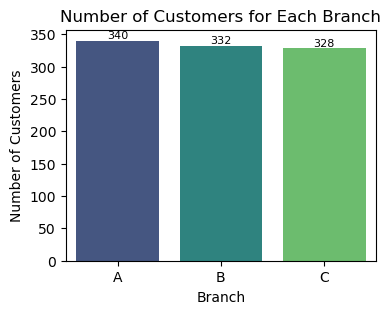

In [14]:
#Setting up a palette
colors = sns.color_palette('Set2')

# Sorting the DataFrame for better visualization
branchnumber = branchnumber.sort_values(by='Number of Customers', ascending=False)

# bar chart
plt.figure(figsize=(4, 3))
barplot = sns.barplot(x='Name of Branch', y='Number of Customers', data=branchnumber, palette='viridis')

# Title and labels
plt.title("Number of Customers for Each Branch", fontsize=12)
plt.xlabel("Branch")
plt.ylabel("Number of Customers")

# Displaying values on the bars
for index, value in enumerate(branchnumber['Number of Customers']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

# Show the bar chart
plt.show()

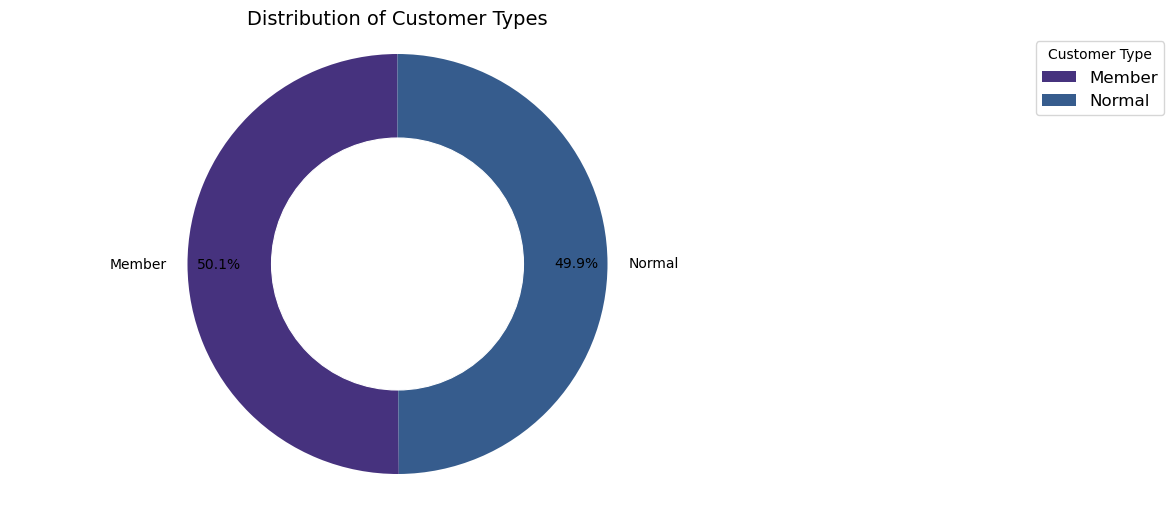

In [15]:
customer_type = df['Customer type'].unique()

# Number of customers in both segments
total_customers = df['Customer type'].value_counts().reset_index()
total_customers = total_customers.rename(columns={'index': 'Type of Customer', 'Customer type': 'Number of Customers'})

# Setting the color palette
colors = sns.color_palette('viridis')

# Plotting the donut chart
plt.figure(figsize=(10, 6))
plt.pie(total_customers['Number of Customers'], labels=total_customers['Type of Customer'], 
        autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.7), pctdistance=0.85)

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.8)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and legend
plt.title("Distribution of Customer Types", fontsize=14)
plt.legend(title="Customer Type", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

plt.show()

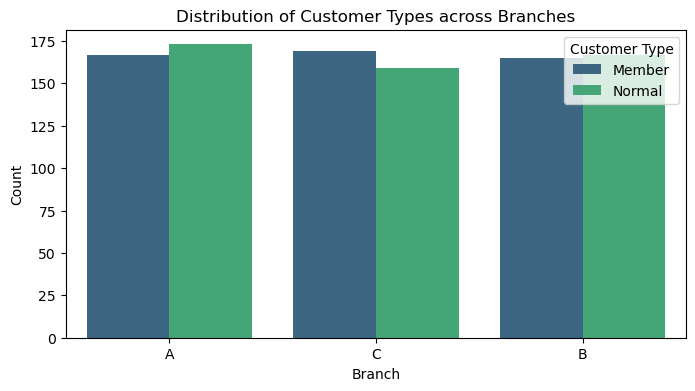

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Branch', hue='Customer type', data=df, palette='viridis')
plt.title('Distribution of Customer Types across Branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Customer Type', loc='upper right')
plt.show()

#### Product line Distribution. Identifying the most and least selling product categories

In [17]:
# Retrieving number of items sold for each category.

df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

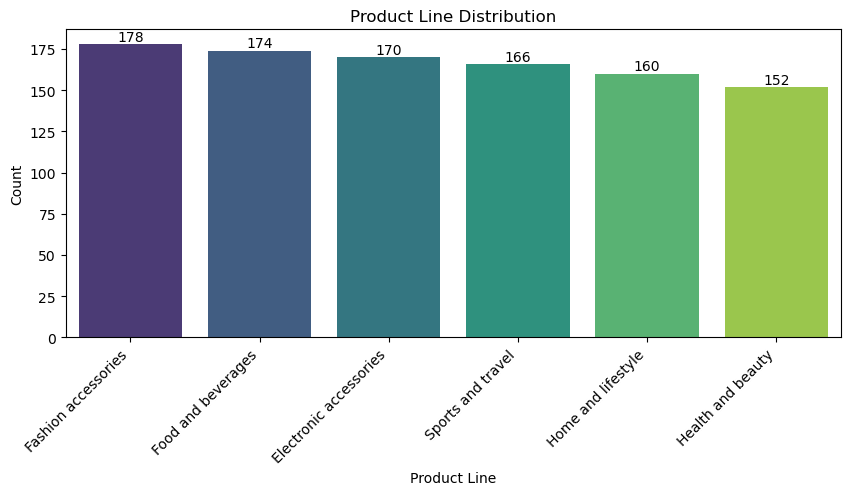

In [18]:
# Get the product line counts
product_line_counts = df['Product line'].value_counts()

# Set the color palette 
colors = sns.color_palette('viridis')

# Plotting a bar chart
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette=colors)
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying values on the bars
for index, value in enumerate(product_line_counts.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Minimum to maximum profit by product category

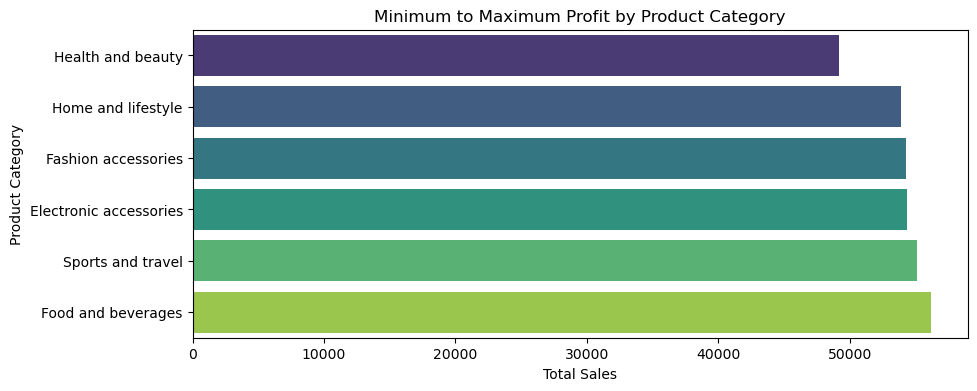

In [20]:
# Sorting the DataFrame for better visualization
category_sales = df.groupby("Product line")["Total"].sum().reset_index()
category_sales = category_sales.sort_values(by='Total', ascending=True)

# Plotting the bar chart
plt.figure(figsize=(10, 4))

# Plotting a bar chart
sns.barplot(x='Total', y='Product line', data=category_sales, palette='viridis')
plt.title('Minimum to Maximum Profit by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
  
plt.show()

### Total gender count of customers

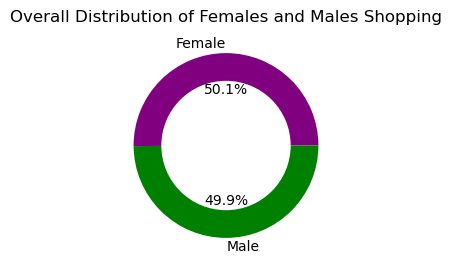

In [21]:
total_gender_count = df['Gender'].value_counts()

# Plot a donut plot
plt.figure(figsize=(3, 3))
plt.pie(total_gender_count, labels=total_gender_count.index, autopct='%1.1f%%', colors=['purple', 'green'], wedgeprops=dict(width=0.3))
plt.title('Overall Distribution of Females and Males Shopping')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.show()

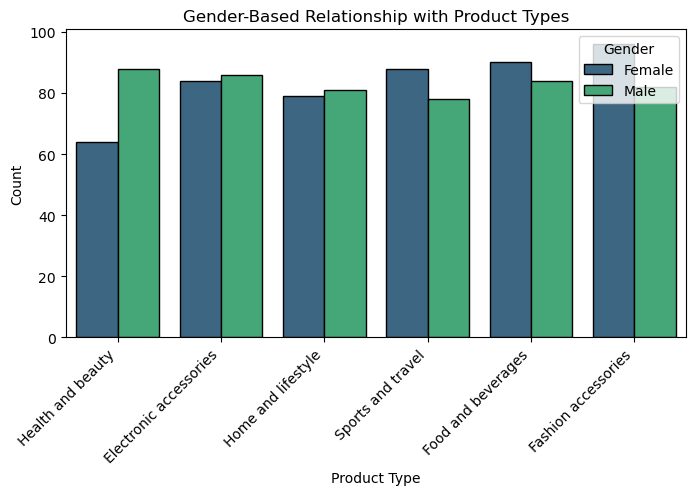

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Product line', hue='Gender', data=df, palette='viridis', edgecolor='k')
plt.title('Gender-Based Relationship with Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Sales per customer category

In [23]:
total_salesbycategory = df.groupby("Customer type")["Total"].sum().reset_index()

#total_salesbycategory = total_salesbycategory.rename(columns)
print(total_salesbycategory)

  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


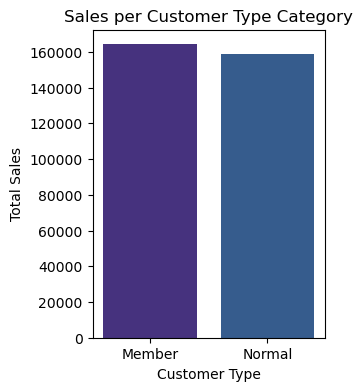

In [24]:
colors = sns.color_palette('viridis')

# Set the figure size
plt.figure(figsize=(3, 4))

# Plotting the bar graph
plt.bar(total_salesbycategory['Customer type'], total_salesbycategory['Total'], color=colors)

# Title and labels
plt.title('Sales per Customer Type Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

# Show the bar graph
plt.show()

### Payment Methods

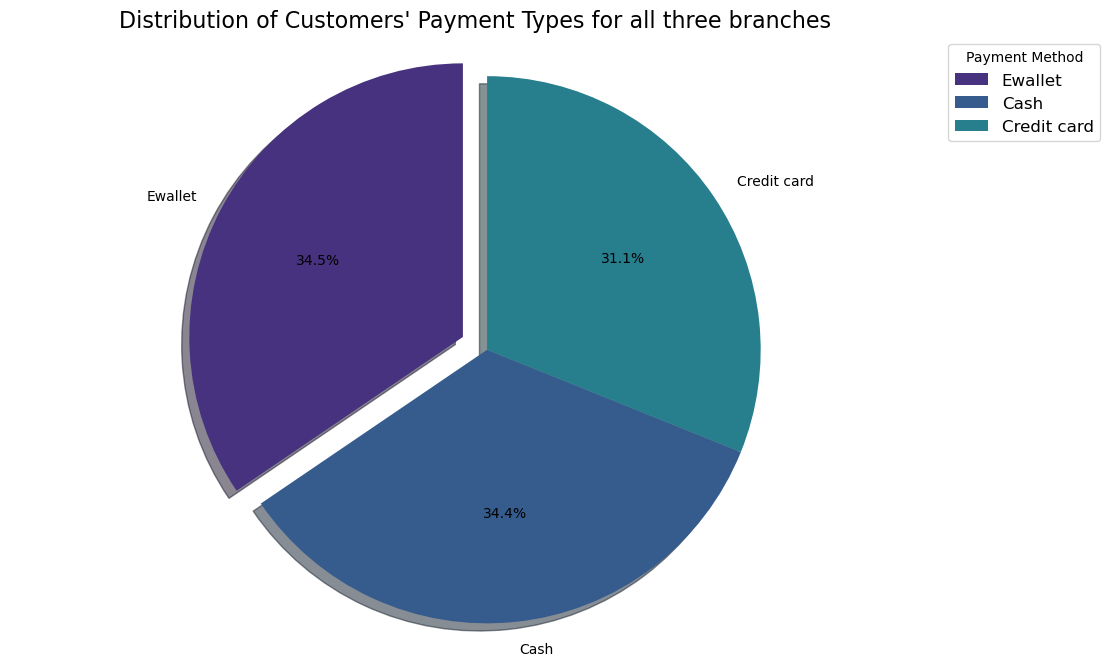

In [25]:
# Getting unique payment methods
payment_method = df['Payment'].unique()

# payment type count
payment_type = df['Payment'].value_counts().reset_index()
payment_type = payment_type.rename(columns={'index': 'Payment Method', 'Payment': 'Total'})

# Setting the color palette
colors = sns.color_palette('viridis')

# Calculate the length of explode dynamically
explode = tuple(0.1 if i == payment_type['Total'].idxmax() else 0 for i in range(len(payment_type)))

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(payment_type['Total'], labels=payment_type['Payment Method'], autopct='%1.1f%%', colors=colors, startangle=90, shadow=True, explode=explode)

# Title
plt.title("Distribution of Customers' Payment Types for all three branches", fontsize=16)
plt.legend(title="Payment Method", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Equal aspect ratio
plt.axis('equal')

plt.show()

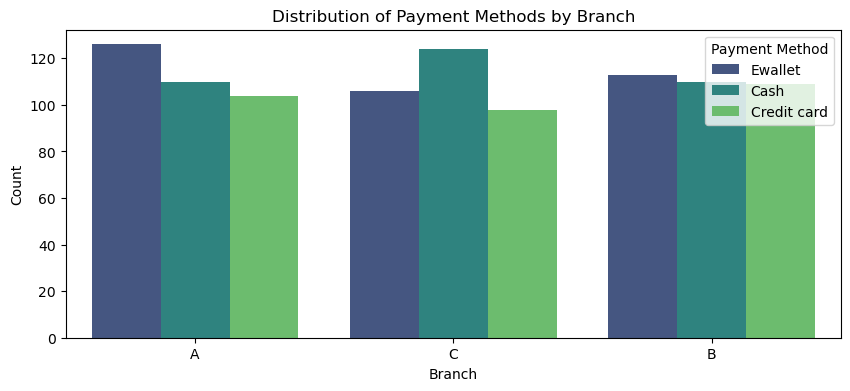

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Branch', hue='Payment', data=df, palette='viridis')
plt.title('Distribution of Payment Methods by Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Payment Method', loc='upper right')
plt.show()

### Correlation visualizations

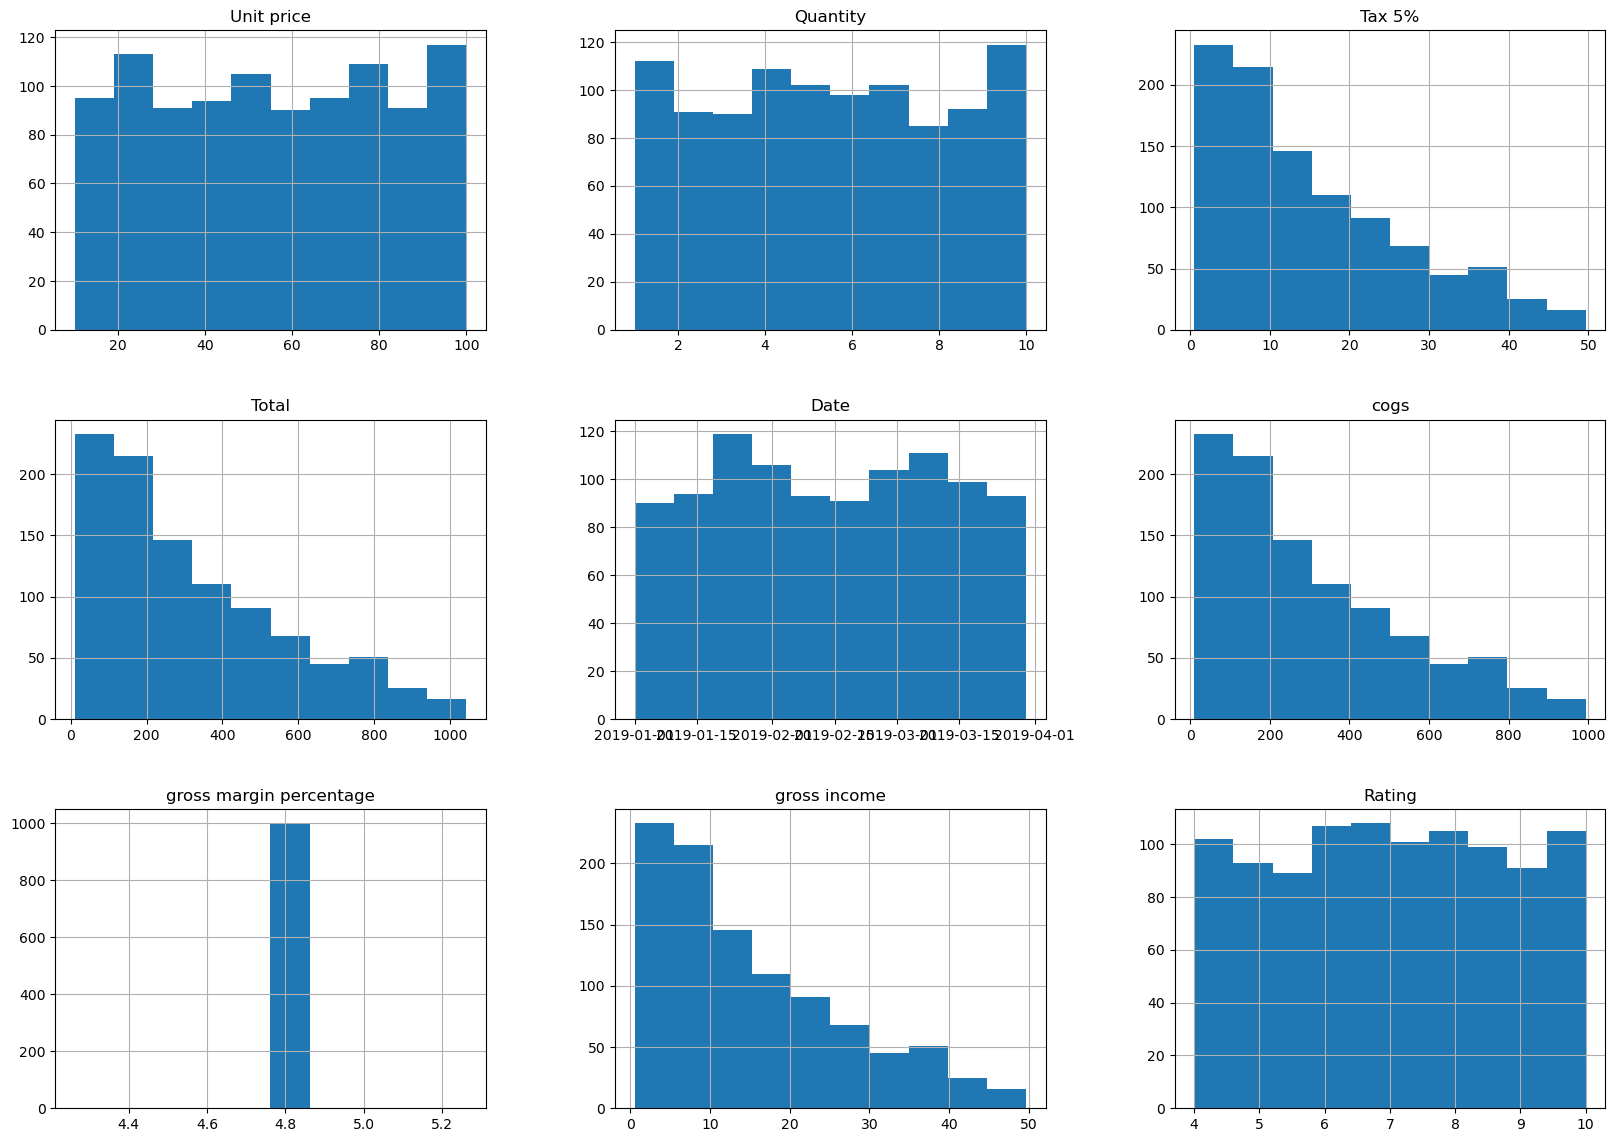

In [27]:
# Generating histograms for each numerical column in the dataframe

df.hist(figsize=(20,14))
plt.show()

In [28]:
# Calculating the pairwise correlation coefficients between numerical columns in the DataFrame. 
#Dropping gross margin percentage as it has a constant value.

df.drop(columns = ['gross margin percentage']).corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: >

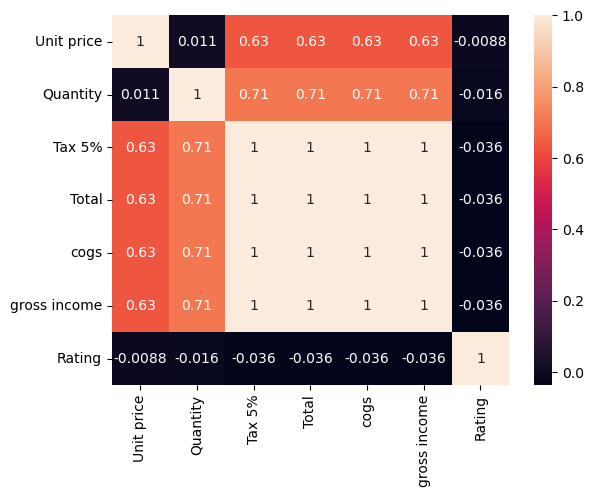

In [29]:
#heatmap

sns.heatmap(df.drop(columns = ['gross margin percentage']).corr(), annot = True)

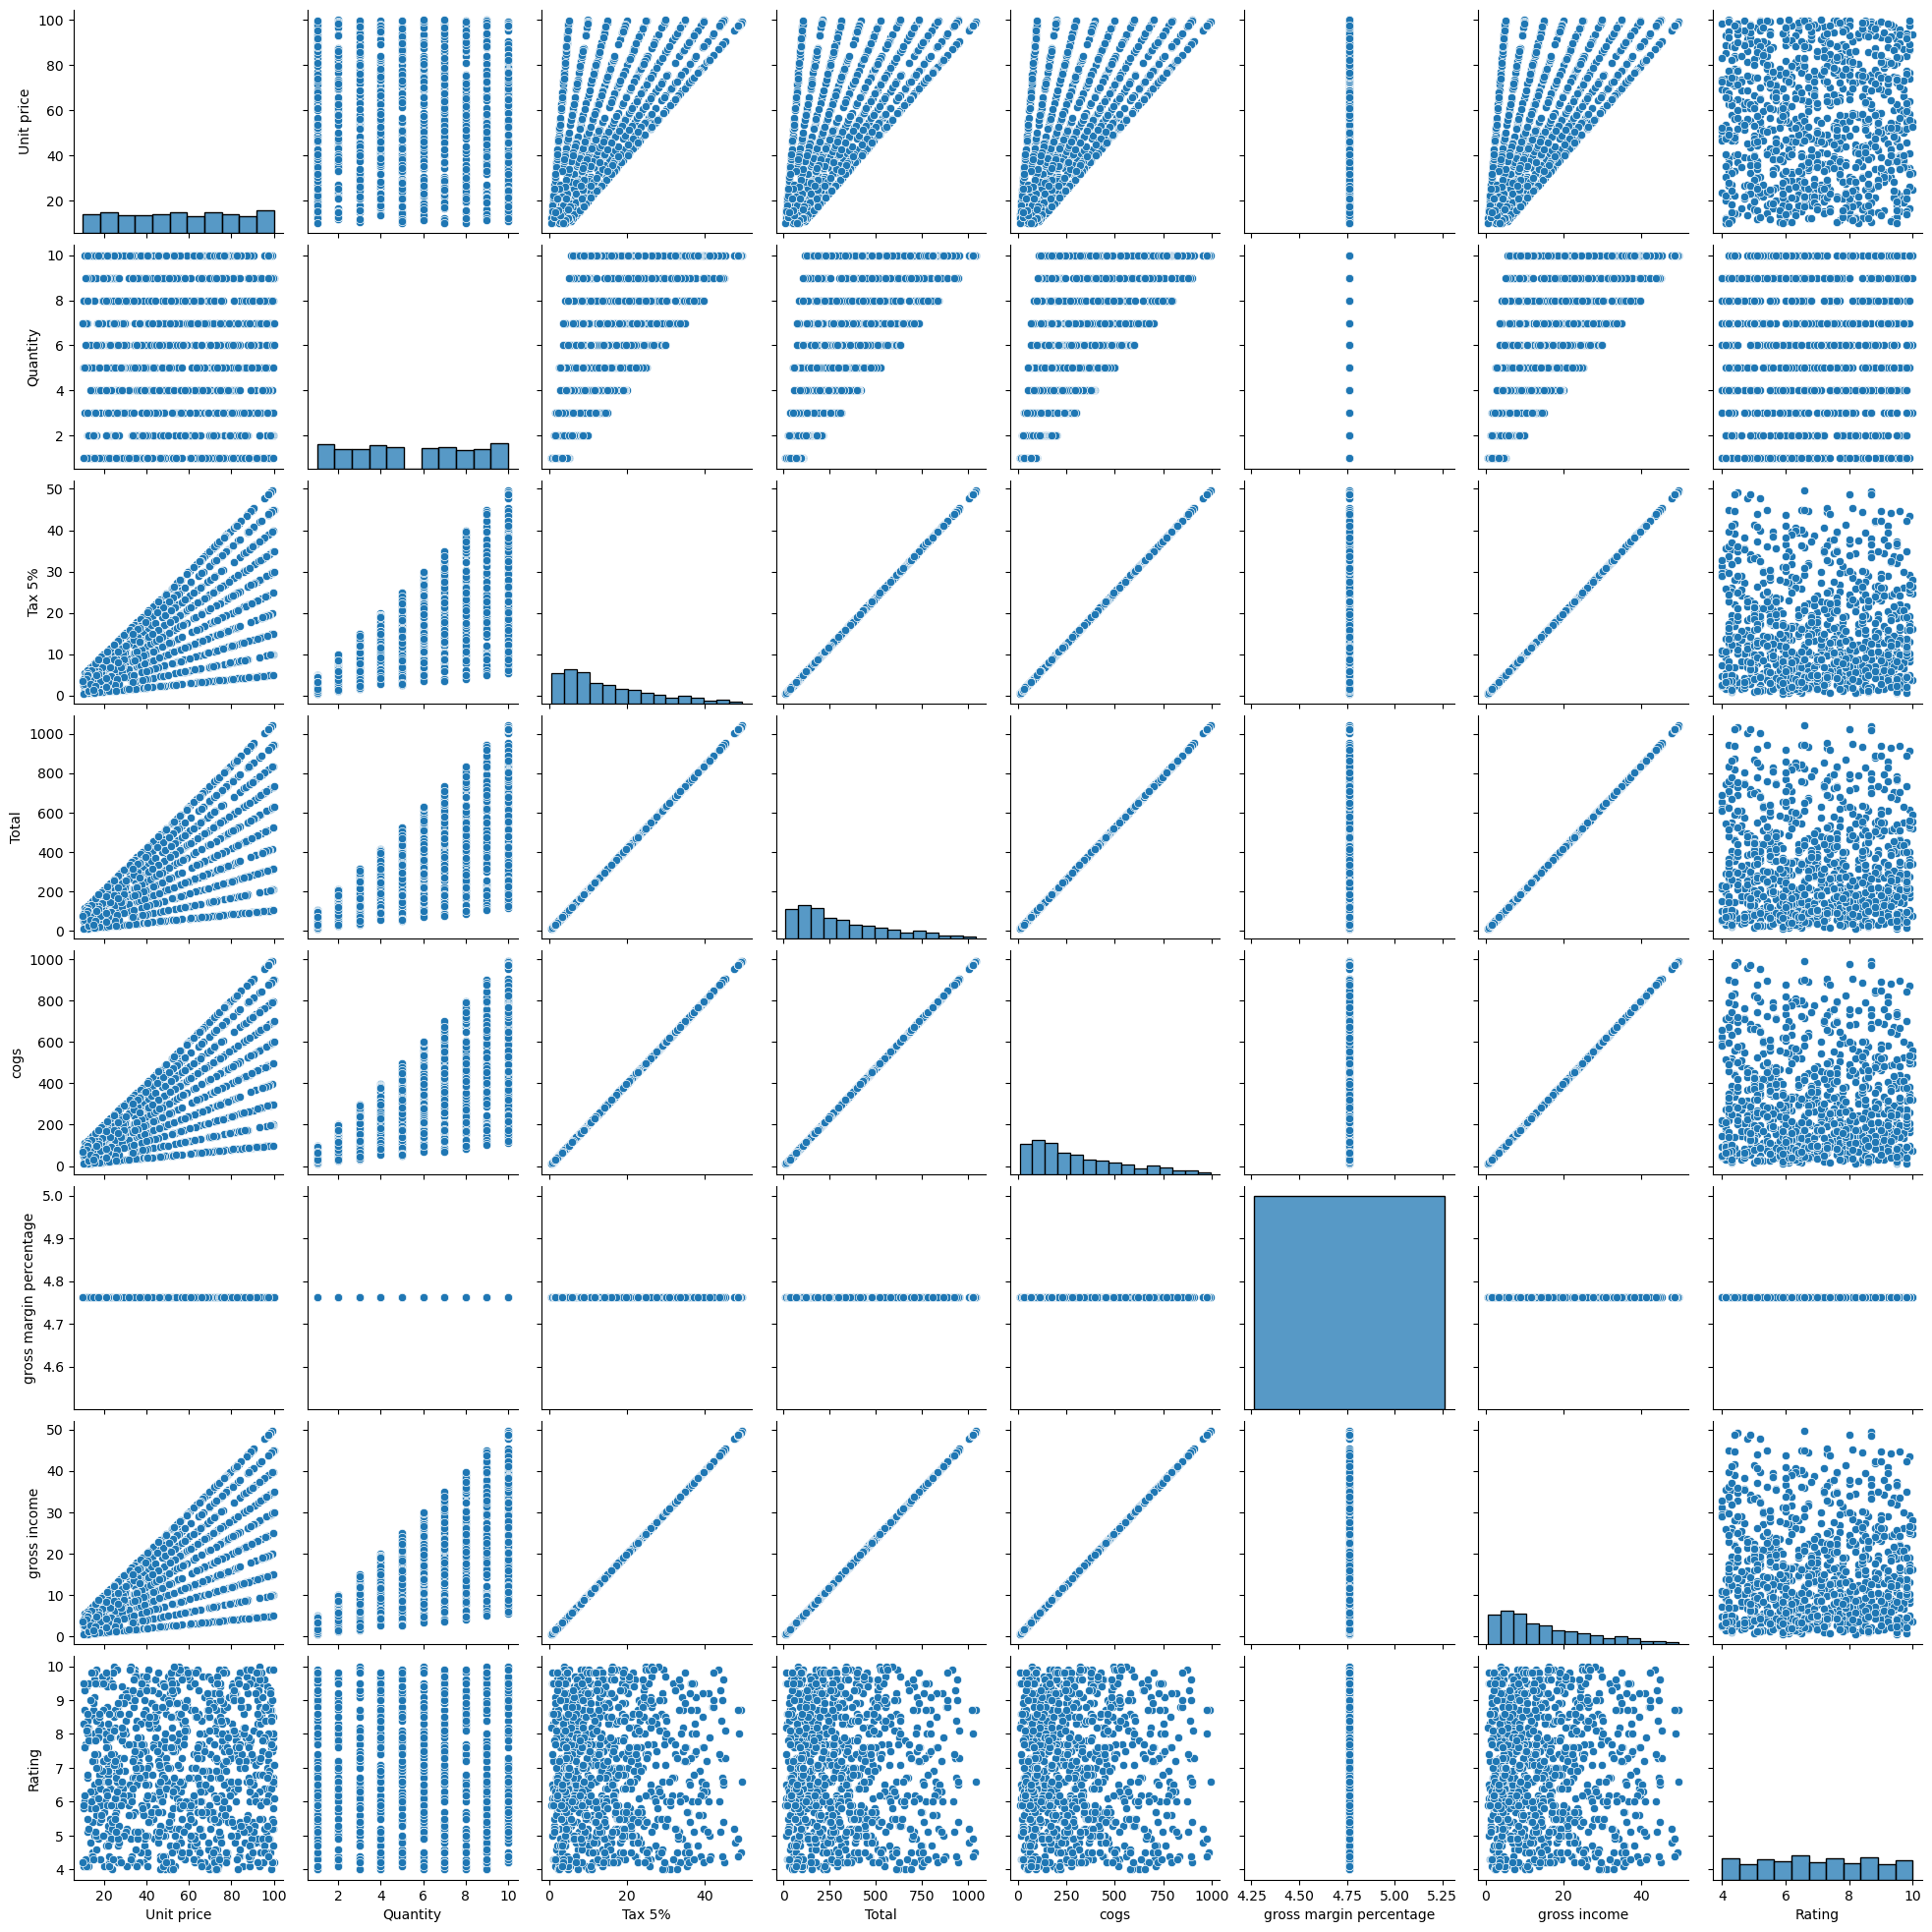

In [30]:
# Visualizing pairwise relationships and distributions of numerical variables in the DataFrame using Seaborn.
# Each scatterplot in the grid represents the relationship between two variables.
# showcase the univariate distribution of each variable.
#Useful for exploring potential patterns and correlations in the data.

sns.pairplot(df)

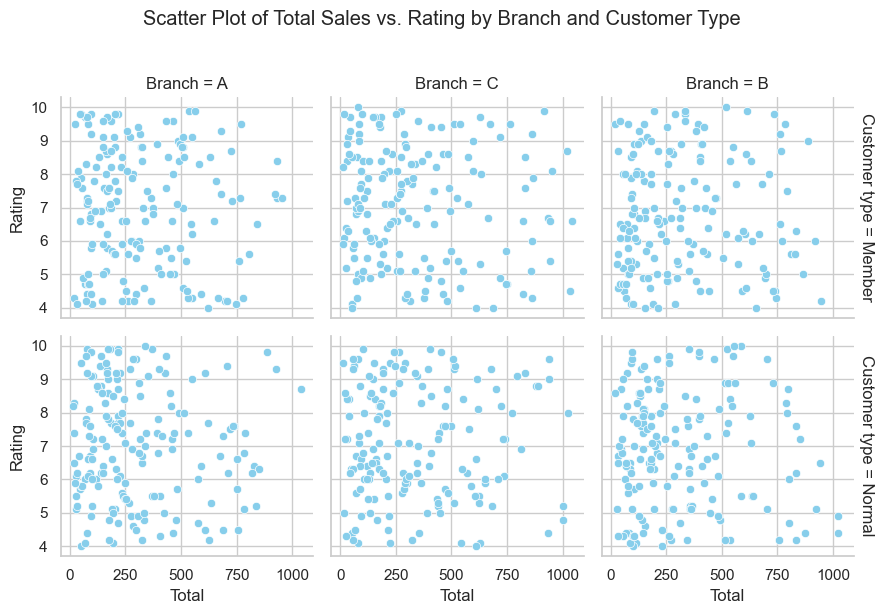

In [31]:
sns.set(style="whitegrid")

# Creating a FacetGrid with Seaborn
g = sns.FacetGrid(df, col="Branch", row="Customer type", margin_titles=True)

# Mapping the scatter plot onto the grid
g.map(sns.scatterplot, "Total", "Rating", color="skyblue")

# Adding a title to the overall plot
g.fig.suptitle("Scatter Plot of Total Sales vs. Rating by Branch and Customer Type", y=1.02)


plt.tight_layout()
plt.show()

### Verifying the effect of holidays on sales on all branches of the supermarket

In [32]:
df['Holiday'] = df['Date'].dt.month == 12
holiday_sales = df[df['Holiday']].groupby('Branch')['Total'].sum().reset_index()

In [33]:
# Check if there is any data for Christmas
if not holiday_sales.empty:
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Branch', y='Total', data=holiday_sales, palette='viridis')
    plt.title('Holiday Season Sales by Branch')
    plt.xlabel('Branch')
    plt.ylabel('Total Sales during Holidays')
    plt.show()
else:
    print("No data available for the holiday season.")


No data available for the holiday season.


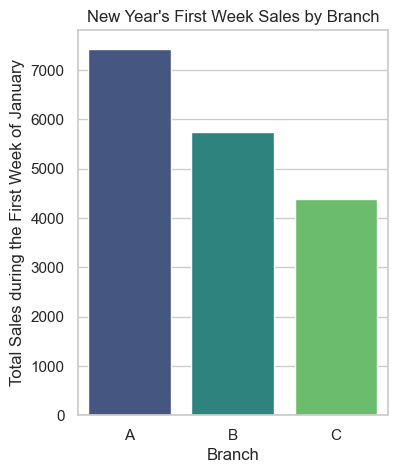

In [34]:
# Assuming New Year's is in January
new_years_first_week = df[(df['Date'].dt.month == 1) & (df['Date'].dt.week == 1)].groupby('Branch')['Total'].sum().reset_index()

# Checking if there is any data for the first week of January
if not new_years_first_week.empty:
    
    plt.figure(figsize=(4, 5))
    sns.barplot(x='Branch', y='Total', data=new_years_first_week, palette='viridis')
    plt.title('New Year\'s First Week Sales by Branch')
    plt.xlabel('Branch')
    plt.ylabel('Total Sales during the First Week of January')
    plt.show()
else:
    print("No data available for New Year's first week sales.")


### Sales of the supermarket over three different months

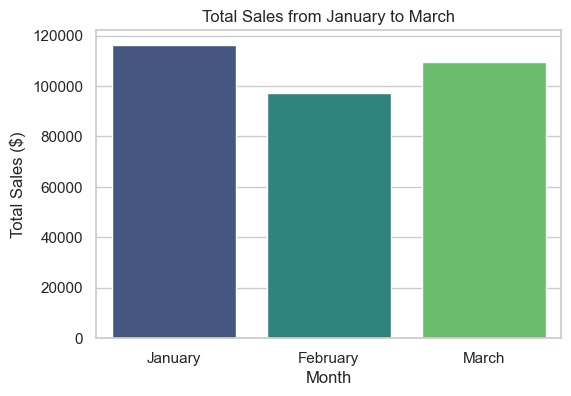

In [35]:
# Filtering data for each month
january_sales = df[df['Date'].dt.month == 1]['Total'].sum()
february_sales = df[df['Date'].dt.month == 2]['Total'].sum()
march_sales = df[df['Date'].dt.month == 3]['Total'].sum()

# Creating a bar chart
months = ['January', 'February', 'March']
sales = [january_sales, february_sales, march_sales]

plt.figure(figsize=(6, 4))
sns.barplot(x=months, y=sales, palette='viridis')
plt.title('Total Sales from January to March')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

## Sales trends overtime

In [36]:
# Group data by date and sum the total sales for each day
daily_sales = df.groupby('Date')['Total'].sum().reset_index()

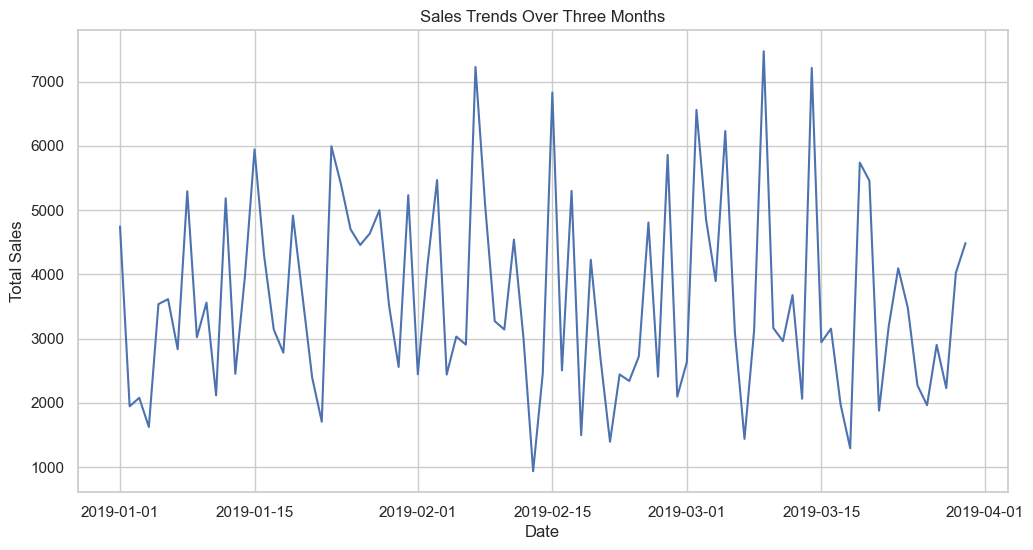

In [37]:
# Setting the style and size of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the sales trends
sns.lineplot(x='Date', y='Total', data=daily_sales)

# Setting plot labels and title
plt.title('Sales Trends Over Three Months')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

### Top 5 customers for all 3 months

In [38]:
customer_sales = df.groupby(['Invoice ID'])['Total'].sum().reset_index()

#sorting in descending order
top_spenders = customer_sales.sort_values(by = 'Total', ascending = False)

print(top_spenders.head().reset_index(drop = True))

    Invoice ID    Total
0  860-79-0874  1042.65
1  687-47-8271  1039.29
2  283-26-5248  1034.46
3  751-41-9720  1023.75
4  303-96-2227  1022.49


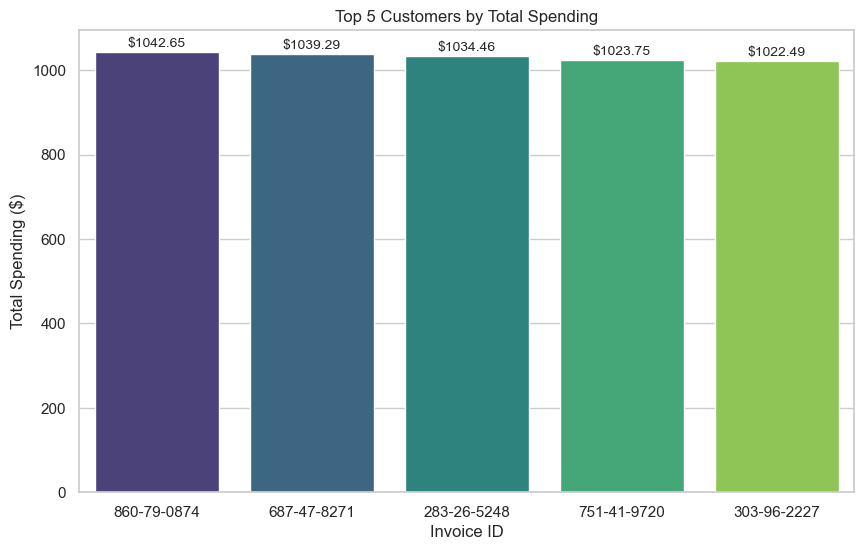

In [39]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Invoice ID', y='Total', data=top_spenders.head(), palette='viridis')

# Add text labels on the bars
for index, value in enumerate(top_spenders.head()['Total']):
    bar_plot.text(index, value + 5, f"${value:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Invoice ID')
plt.ylabel('Total Spending ($)')
plt.show()

In [40]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Holiday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,False
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,False
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,False
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,False
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,False


### Peak and off-peak hours

Unique highest sale hour(s): Int64Index([19], dtype='int64', name='Time')


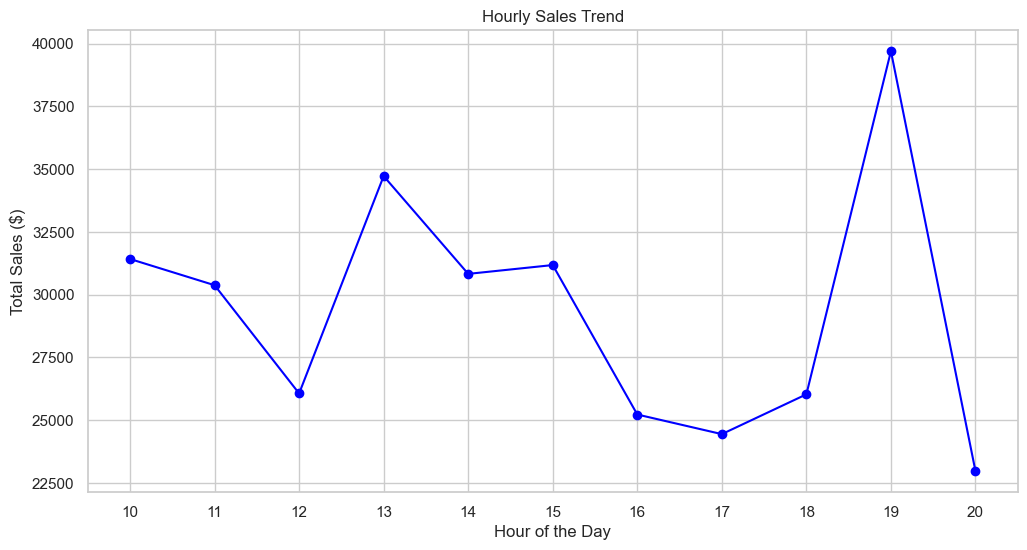

In [41]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Group by hour and calculate total sales
hourly_sales = df.groupby(df['Time'].dt.hour)['Total'].sum()

# Find the hour(s) with the highest total sales
highest_sale_hours = hourly_sales[hourly_sales == hourly_sales.max()].index

# Print and plot the results
print(f"Unique highest sale hour(s): {highest_sale_hours}")

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()

### Distribution of Ratings by branch

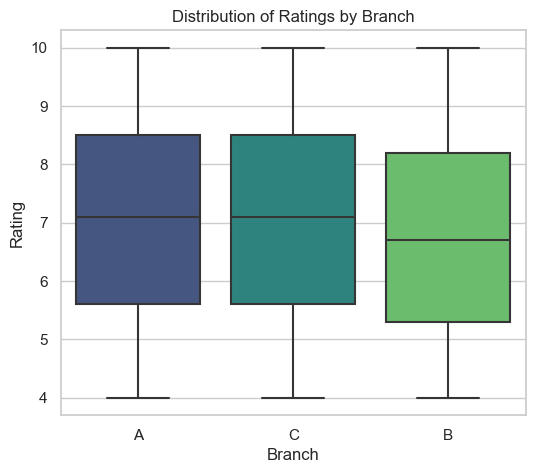

In [42]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Branch', y='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings by Branch')
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.show()